# Weather Data Analysis

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [2]:
weather_data = pd.read_csv('weather.csv')

## Descriptive Statistics:

### For Min Temp

In [3]:
selected_variable = 'MinTemp'
mean_value = weather_data[selected_variable].mean()
median_value = weather_data[selected_variable].median()
std_dev_value = weather_data[selected_variable].std()
print(f"Descriptive Statistics for {selected_variable}:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")

Descriptive Statistics for MinTemp:
Mean: 7.265573770491804
Median: 7.45
Standard Deviation: 6.025799834253392


### For Max Temp

In [4]:
selected_variable = 'MaxTemp'
mean_value = weather_data[selected_variable].mean()
median_value = weather_data[selected_variable].median()
std_dev_value = weather_data[selected_variable].std()
print(f"Descriptive Statistics for {selected_variable}:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")

Descriptive Statistics for MaxTemp:
Mean: 20.550273224043714
Median: 19.65
Standard Deviation: 6.690515669598577


### For RainFall

In [5]:
selected_variable = 'Rainfall'
mean_value = weather_data[selected_variable].mean()
median_value = weather_data[selected_variable].median()
std_dev_value = weather_data[selected_variable].std()
print(f"Descriptive Statistics for {selected_variable}:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")

Descriptive Statistics for Rainfall:
Mean: 1.428415300546448
Median: 0.0
Standard Deviation: 4.225799585804051


### For Evaporation

In [6]:
selected_variable = 'Evaporation'
mean_value = weather_data[selected_variable].mean()
median_value = weather_data[selected_variable].median()
std_dev_value = weather_data[selected_variable].std()
print(f"Descriptive Statistics for {selected_variable}:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")

Descriptive Statistics for Evaporation:
Mean: 4.521857923497268
Median: 4.2
Standard Deviation: 2.6693825342212643


## Time Series Visualization:

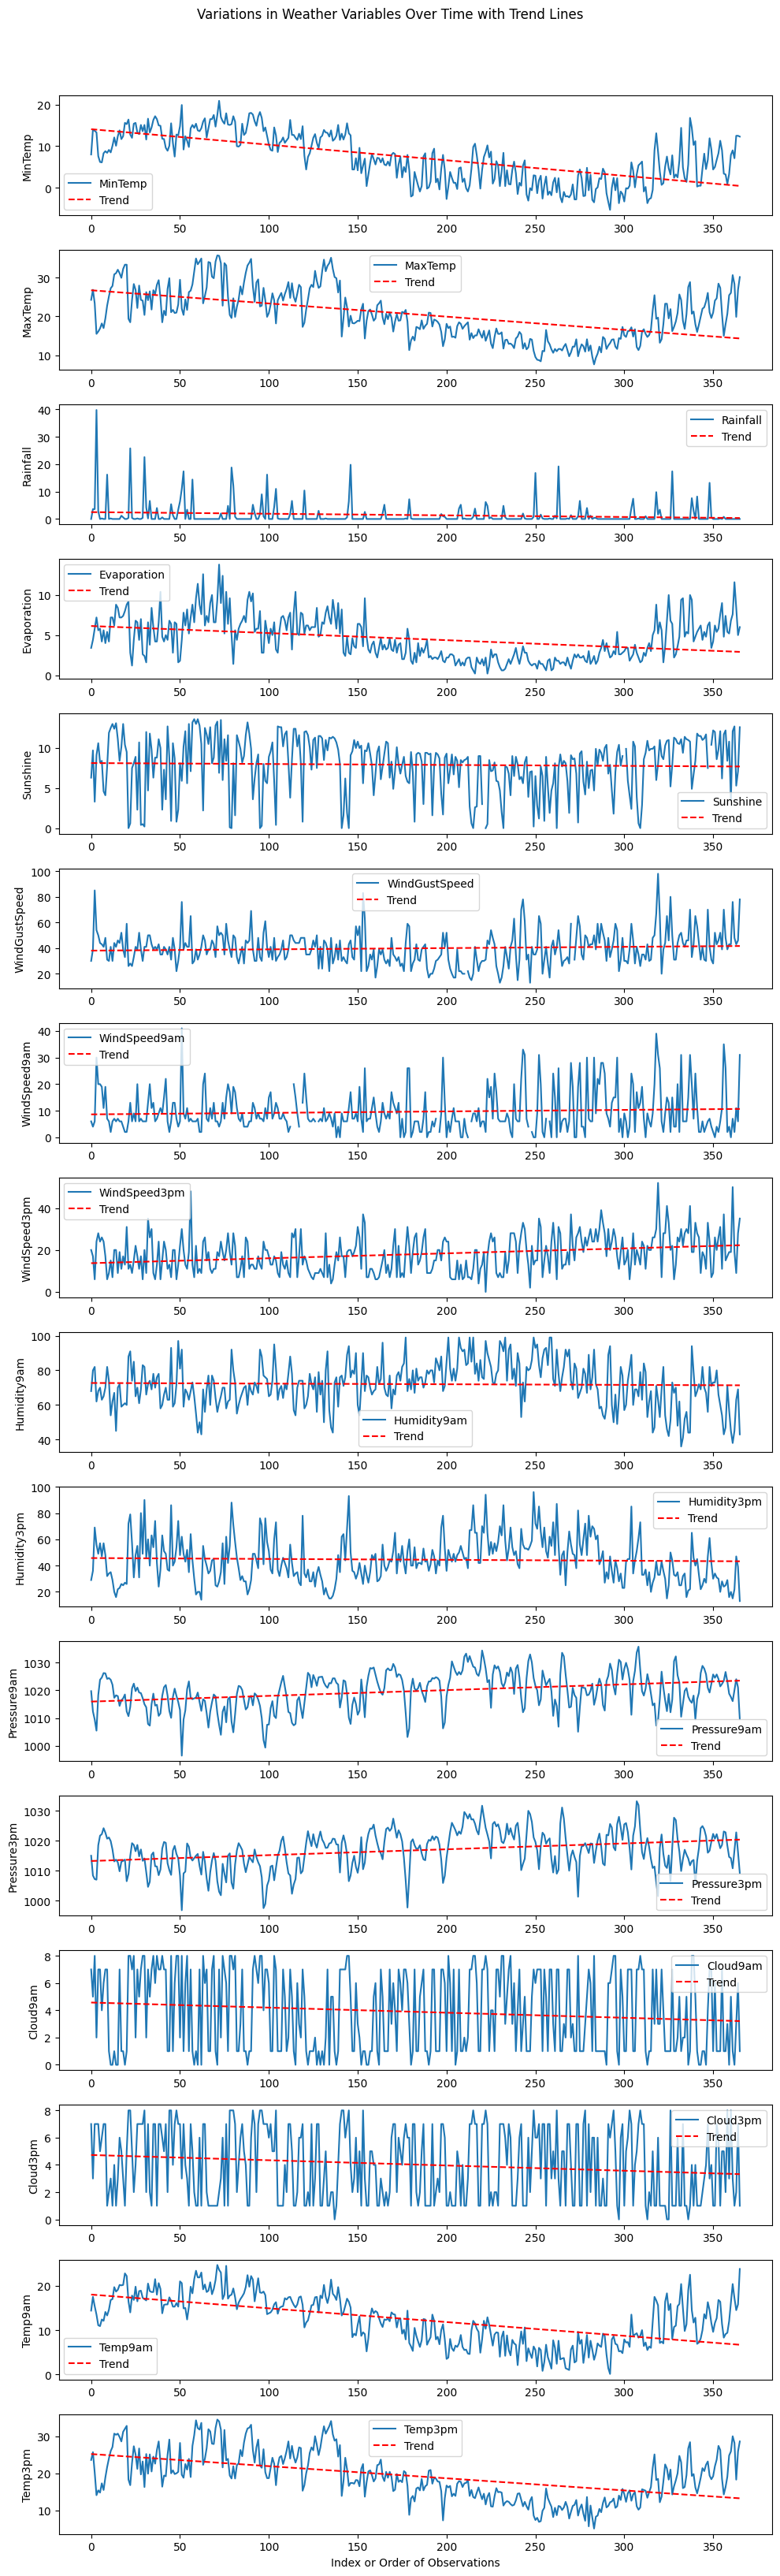

In [7]:
weather_variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
fig, axes = plt.subplots(nrows=len(weather_variables), figsize=(10, 2*len(weather_variables)))

for i, variable in enumerate(weather_variables):
    axes[i].plot(weather_data.index, weather_data[variable], label=variable)
    if not weather_data[variable].isnull().all():
        valid_indices = ~weather_data[variable].isnull()
        if sum(valid_indices) > 1:  
            z = np.polyfit(weather_data.index[valid_indices], weather_data[variable][valid_indices], 1)
            p = np.poly1d(z)
            axes[i].plot(weather_data.index, p(weather_data.index), 'r--', label='Trend')
        else:
            print(f"Not enough data to calculate trend for {variable}")
    else:
        print(f"No valid data for {variable}")

    axes[i].set_ylabel(variable)
    axes[i].legend()

plt.suptitle('Variations in Weather Variables Over Time with Trend Lines', y=1.02)
plt.xlabel('Index or Order of Observations')
plt.tight_layout()
plt.show()

## Correlation Analysis:

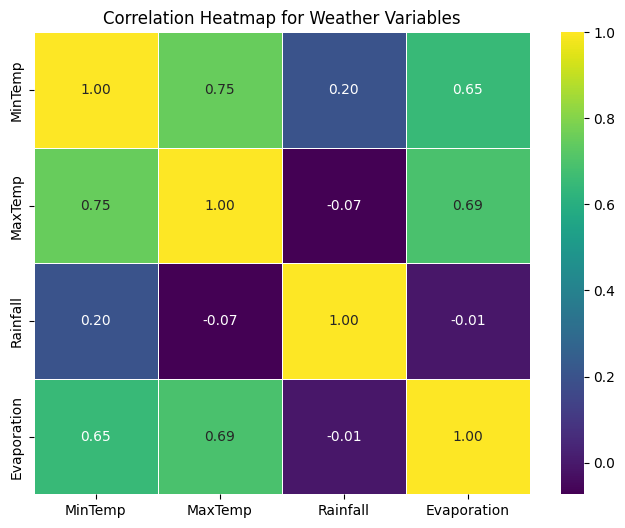

In [8]:
import seaborn as sns
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
df = weather_data[selected_columns]
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Weather Variables')
plt.show()

## Rainfall Distribution:

### Histogram

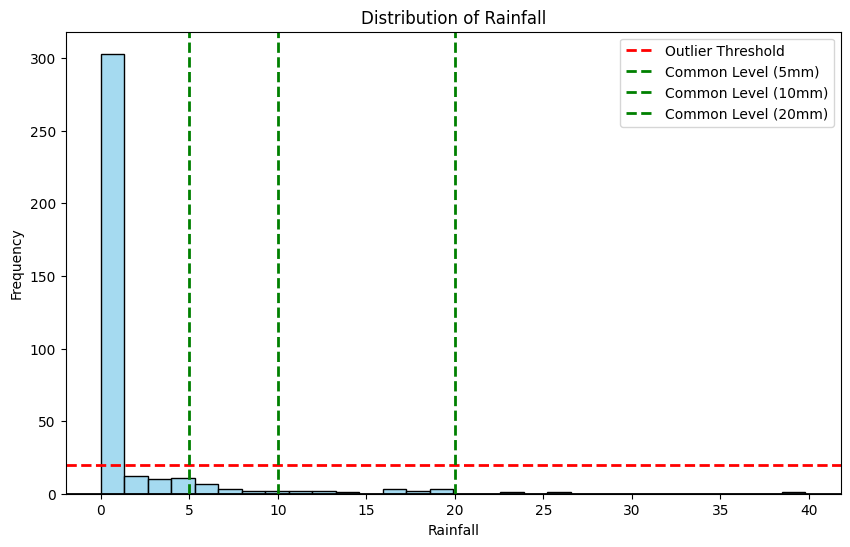

In [9]:
rainfall_data = weather_data['Rainfall'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(rainfall_data, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
common_levels = [5, 10, 20]
outlier_threshold = 20
plt.axhline(y=0, color='black', linewidth=2)
plt.axhline(y=outlier_threshold, color='red', linestyle='--', linewidth=2, label='Outlier Threshold')

for level in common_levels:
    plt.axvline(x=level, color='green', linestyle='--', linewidth=2, label=f'Common Level ({level}mm)')

plt.legend()
plt.show()

### kernel density

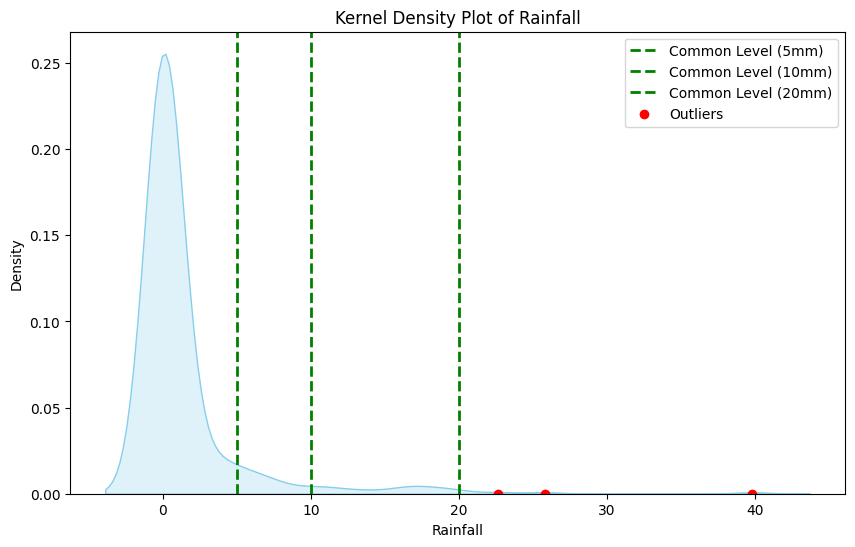

In [10]:
rainfall_data = weather_data['Rainfall'].dropna()
plt.figure(figsize=(10, 6))
sns.kdeplot(rainfall_data, color='skyblue', fill=True)
plt.title('Kernel Density Plot of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')
common_levels = [5, 10, 20]
for level in common_levels:
    plt.axvline(x=level, color='green', linestyle='--', linewidth=2, label=f'Common Level ({level}mm)')
outlier_threshold = 20
outliers = rainfall_data[rainfall_data > outlier_threshold]
plt.scatter(outliers, np.zeros_like(outliers), color='red', marker='o', label='Outliers')

plt.legend()
plt.show()

## Seasonal Analysis:

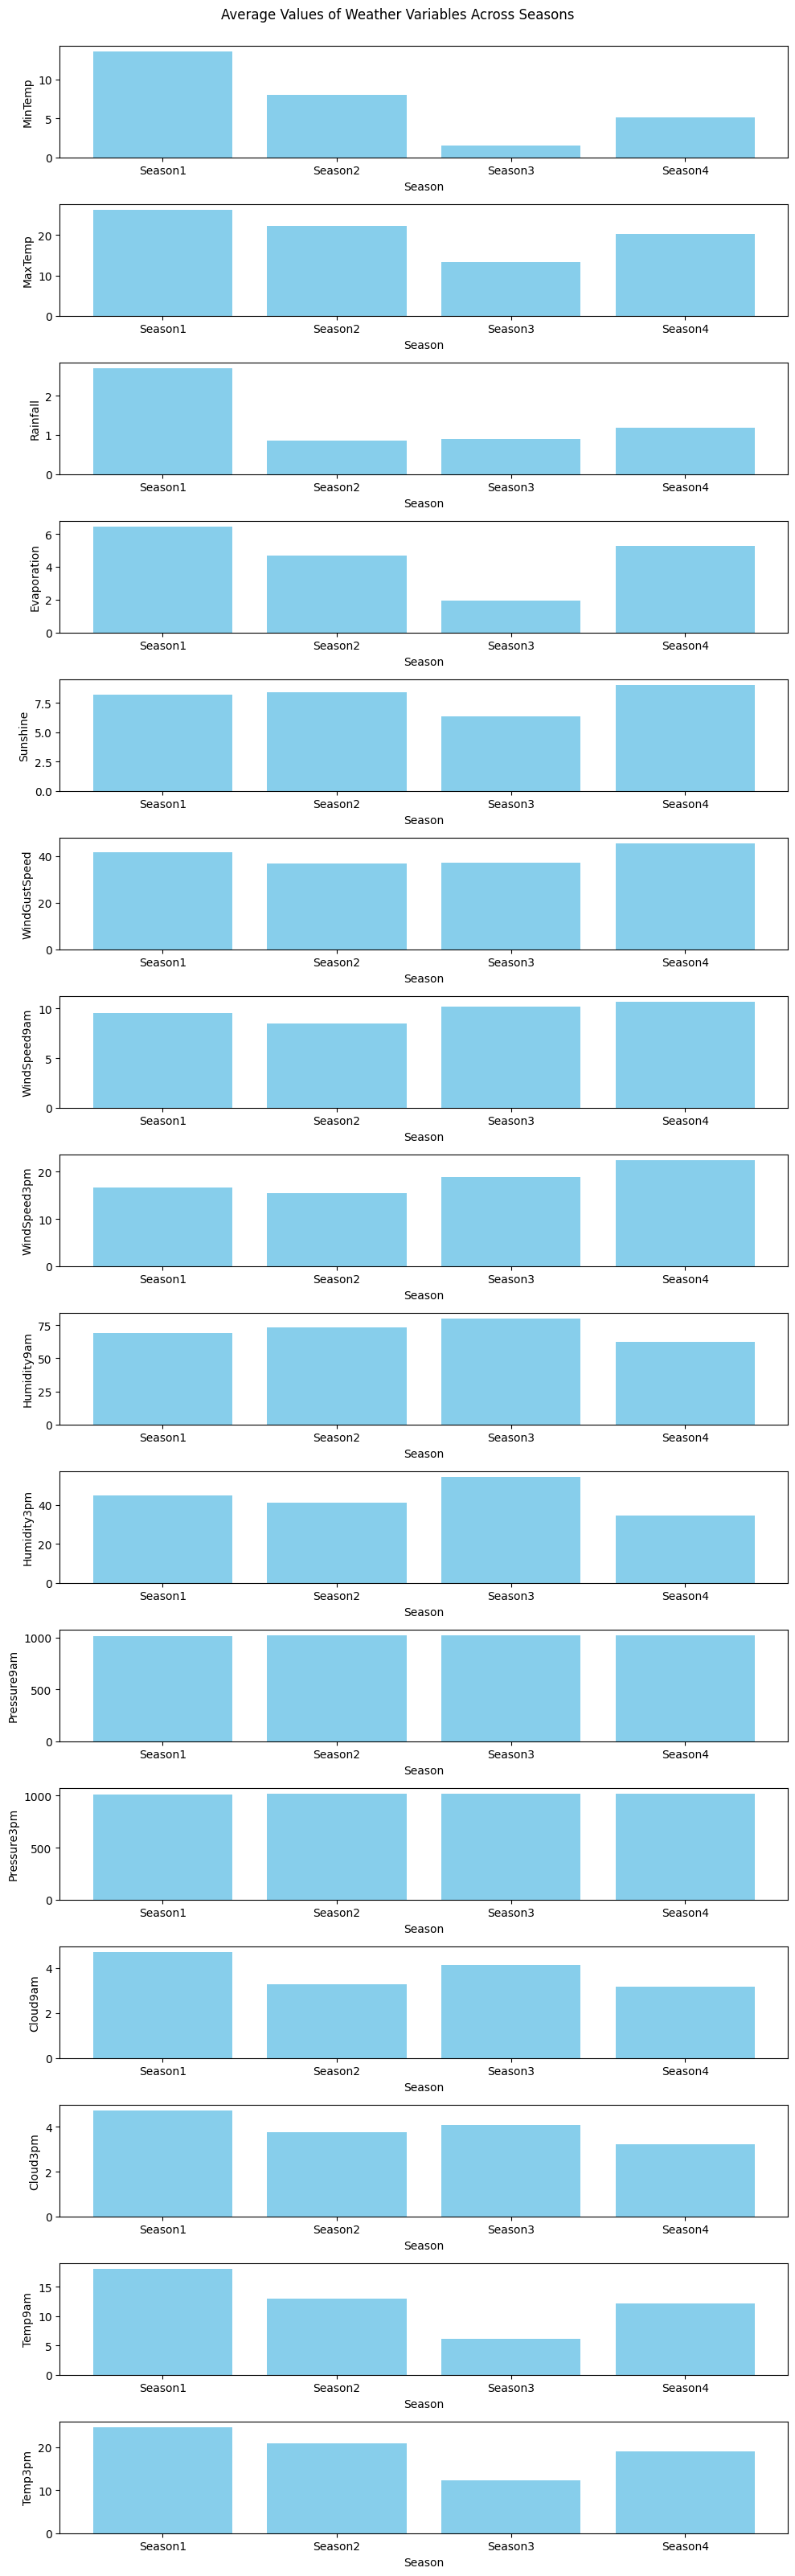

In [37]:
weather_data['Index'] = range(len(weather_data))
weather_data['Season'] = np.select(
    [
        (weather_data['Index'] >= 0) & (weather_data['Index'] < 100),
        (weather_data['Index'] >= 100) & (weather_data['Index'] < 200),
        (weather_data['Index'] >= 200) & (weather_data['Index'] < 300),
    ],
    ["Season1", "Season2", "Season3"],
    default="Season4")
selected_variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
seasonal_averages = weather_data.groupby('Season')[selected_variables].mean()
fig, axes = plt.subplots(nrows=len(selected_variables), figsize=(10, 2*len(selected_variables)))

for i, variable in enumerate(selected_variables):
    axes[i].bar(seasonal_averages.index, seasonal_averages[variable], color='skyblue')
    axes[i].set_ylabel(variable)
    axes[i].set_xlabel('Season')
plt.suptitle('Average Values of Weather Variables Across Seasons', y=1)
plt.tight_layout()
plt.show()